In [28]:
from __init__ import *

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import matplotlib.colors as colors

from snmcseq_utils import cd
from snmcseq_utils import create_logger
from CEMBA_update_mysql import connect_sql

In [2]:
log = create_logger()
log.info("Hello")

05/11/2018 01:52:42 PM Hello


In [66]:
ens = 'Ens0'
cluster_type = 'mCH_npc50_k30_merged'

# allc tables
ens_path = os.path.join(PATH_ENSEMBLES, ens)
n_clusters = len(glob.glob(
    os.path.join(ens_path, 'allc_merged/{}/allc_merged_mCG_{}_*_{}.tsv'.format(cluster_type, cluster_type, ens))))

# info
f = '/cndd/Public_Datasets/human_snmcseq/Ensembles/Ens0/Ens0_merged.tsv'
df_info = pd.read_table(f, index_col='cell_name')
print(df_info.shape)
f = '/cndd/Public_Datasets/human_snmcseq/Ensembles/Ens0/mapping_summary_Ens0.tsv'
df_meta = pd.read_table(f, index_col='Sample')
df_info = pd.merge(df_info, df_meta, left_index=True, right_index=True)
print(df_info.shape)




# dmr results
input_f = os.path.join(ens_path, 'dmr/dmr_allc_merged_mCG_{}_rms_results_collapsed.tsv'.format(cluster_type))
df = pd.read_table(input_f, index_col=['#chr', 'start', 'end'], dtype={'#chr': object})

(6291, 5)
(6291, 21)


/cndd/fangming/venvs/venv_banjo_snmcseq/lib/python3.4/site-packages/numpy/lib/arraysetops.py:466: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
print(df.shape)
df.head()

(2271419, 20)


number_of_dms  \
#chr start end                    
1    13417 13537              4   
     13823 13828              2   
     54489 54489              1   
     56298 56305              2   
     57691 57691              1   

                                            hypermethylated_samples  \
#chr start end                                                        
1    13417 13537  merged_mCG_mCH_npc50_k30_merged_1_Ens0_mergest...   
     13823 13828                                                NaN   
     54489 54489                                                NaN   
     56298 56305                                                NaN   
     57691 57691                                                NaN   

                                             hypomethylated_samples  \
#chr start end                                                        
1    13417 13537  merged_mCG_mCH_npc50_k30_merged_10_Ens0_merges...   
     13823 13828  merged_mCG_mCH_npc50_k30_merged_10_Ens0_merges...   
     54489 54489                                                NaN   
     56298 56305  merged_mCG_mCH_npc50_k30_merged_15_Ens0_merges...   
     57691 57691  merged_mCG_mCH_npc50_k30_merged_1_Ens0_mergest...   

                  methylation_level_merged_mCG_mCH_npc50_k30_merged_10_Ens0_mergestrands  \
#chr start end                                                                             
1    13417 13537                                           0.650000                        
     13823 13828                                           0.263158                        
     54489 54489                                           0.538462                        
     56298 56305                                           0.840000                        
     57691 57691                                           0.750000                        

                  methylation_level_merged_mCG_mCH_npc50_k30_merged_11_Ens0_mergestrands  \
#chr start end                                                                             
1    13417 13537                                           0.482072                        
     13823 13828                                           0.872727                        
     54489 54489                                           0.714286                        
     56298 56305                                           0.575758                        
     57691 57691                                                NaN                        

                  methylation_level_merged_mCG_mCH_npc50_k30_merged_14_Ens0_mergestrands  \
#chr start end                                                                             
1    13417 13537                                           0.691824                        
     13823 13828                                           0.863636                        
     54489 54489                                           0.500000                        
     56298 56305                                           0.666667                        
     57691 57691                                           0.500000                        

                  methylation_level_merged_mCG_mCH_npc50_k30_merged_15_Ens0_mergestrands  \
#chr start end                                                                             
1    13417 13537                                           0.944444                        
     13823 13828                                           0.476190                        
     54489 54489                                           0.428571                        
     56298 56305                                           0.210526                        
     57691 57691                                           0.666667                        

                  methylation_level_merged_mCG_mCH_npc50_k30_merged_1_Ens0_mergestrands  \
#chr start end                                                                            
1    13417 135

In [67]:
print(df_info.shape)
df_info.head()

(6291, 21)


,dataset,cluster,annotation,tsne_x,tsne_y,Library pool,Layer,Total reads,Mapped reads,Mapping rate,...,Nonclonal rates,Lambda mC/C,mCCC/CCC,mCG/CG,mCH/CH,Estimated mCG/CG,Estimated mCH/CH,% Genome covered,Biosample,allc file location (Mukamel lab)
160729_MB_v1_hs_25yr_MFG_pool_1000_AD008_indexed,MB_v1,34,hSst-2,4.023829,50.359272,K1K2,NaN,6947874.0,3881291.0,55.90%,...,50.70%,NaN,0.00772,0.81781,0.03853,0.81639,0.03105,6.94,MB_v1,NaN
160729_MB_v1_hs_25yr_MFG_pool_1019_AD006_indexed,MB_v1,34,hSst-2,-24.774567,89.472031,L1L2,NaN,8849490.0,5049795.0,57.10%,...,42.80%,NaN,0.01195,0.83620,0.06393,0.83422,0.05261,7.19,MB_v1,NaN
160729_MB_v1_hs_25yr_MFG_pool_101_AD010_indexed,MB_v1,34,hSst-2,-11.439241,80.250549,20160729_B1B2,NaN,4441591.0,2283700.0,51.40%,...,60.30%,NaN,0.01352,0.83509,0.07130,0.83283,0.05857,4.70,MB_v1,NaN
160729_MB_v1_hs_25yr_MFG_pool_1022_AD006_indexed,MB_v1,34,hSst-2,3.210637,48.236778,L1L2,NaN,7943555.0,4719450.0,59.40%,...,45.80%,NaN,0.00735,0.82081,0.03745,0.81948,0.03032,7.20,MB_v1,NaN
160729_MB_v1_hs_25yr_MFG_pool_1033_AD002_indexed,MB_v1,34,hSst-2,-21.555132,89.407265,L1L2,NaN,3505965.0,1842072.0,52.50%,...,54.60%,NaN,0.00890,0.83048,0.04493,0.82896,0.03635,3.51,MB_v1,NaN


In [68]:
clusters = df_info.groupby('cluster').first().index.values
print(clusters)
df_annot = df_info.groupby('cluster').first()


[ 1  2  3  4  6  9 10 11 14 15 33 34 35 36 37 38 39]


In [7]:
# organize df_hypo 

df_hypo = df.drop('hypermethylated_samples', axis=1)[
    (~df['hypomethylated_samples'].isnull()) & (df['number_of_dms']>=3)].copy()

df_hypo['hypomethylated_samples'] = df_hypo['hypomethylated_samples'].apply(lambda x: x.split(','))

df_hypo['hypomethylated_samples'] = df_hypo['hypomethylated_samples'].apply(lambda x: 
        [int(item[len('merged_mCG_mCH_npc50_k30_merged_'):-len('_{}_mergestrands'.format(ens))]) for item in x])

cols = []
for col in df_hypo.columns:
    if col.startswith('methylation_level_merged_mCG_mCH_npc50_k30_merged_'):
        col = col[len('methylation_level_merged_mCG_mCH_npc50_k30_merged_'):]
    if col.endswith('_Ens0_mergestrands'):
        col = col[:-len('_Ens0_mergestrands'):]
    try:
        cols.append(int(col))
    except:
        cols.append(col)
df_hypo.columns = cols 

df_hypo = df_hypo.rename(columns={'number_of_dms': 'dms', 'hypomethylated_samples': 'hypo'})[
    ['dms', 'hypo'] + clusters.tolist()]
df_hypo.head()

dms             hypo         1         2         3  \
#chr start  end                                                          
1    13417  13537     4  [10, 11, 36, 9]  0.943396  0.871176  0.958678   
     231418 231735    3       [1, 37, 4]  0.068966  0.200000  0.707317   
     235696 236127    4      [11, 14, 2]  0.752717  0.332574  0.800000   
     540605 540991   22              [1]  0.011125  0.036842  0.005602   
     665018 665077    3             [37]  0.986842  0.972222  0.942857   

                           4         6         9        10        11  \
#chr start  end                                                        
1    13417  13537   0.922764  0.887097  0.615686  0.650000  0.482072   
     231418 231735  0.181818  0.176471  0.750000  0.566667  0.625000   
     235696 236127  0.578199  0.821656  0.687831  0.640845  0.583333   
     540605 540991  0.009697  0.001938  0.468278  0.000000  0.372727   
     665018 665077  0.972973  1.000000  0.883495  0.875000  0.822785   

                          14        15        33        34        35  \
#chr start  end                                                        
1    13417  13537   0.691824  0.944444  0.880000  0.934426  0.773723   
     231418 231735  0.666667  0.136364  0.973684  0.870968  0.875000   
     235696 236127  0.517857  0.914530  0.847291  0.841584  0.756364   
     540605 540991  0.161972  0.000000  0.361775  0.405109  0.334764   
     665018 665077  1.000000  1.000000  0.989474  0.979592  0.962617   

                          36        37        38        39  
#chr start  end                                             
1    13417  13537   0.664740  0.916667  0.936455  0.798283  
     231418 231735  0.920000  0.034483  0.250000  0.821429  
     235696 236127  0.696581  0.839869  0.927536  0.862832  
     540605 540991  0.309677  0.025526  0.007080  0.036145  
     665018 665077  0.978261  0.773913  0.989130  1.000000

In [116]:
# number of dmrs in each cluster
ndmr = []
for cluster in clusters:
    n = df_hypo.loc[df_hypo['hypo'].apply(lambda x: cluster in x), 'hypo'].shape[0]
    ndmr.append({'cluster': cluster, 
                 'num': n})
ndmr = pd.DataFrame(ndmr)

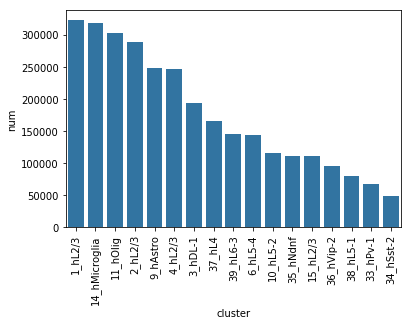

In [9]:
# number of dmrs in each cluster
fig, ax = plt.subplots()
order = ndmr.sort_values('num', ascending=False)['cluster']
sns.barplot(data=ndmr, order=order, x='cluster', y='num', color='C0', ax=ax)
ax.set_xticklabels(['{}_{}'.format(cluster, df_annot.loc[cluster, 'annotation']) for cluster in order], rotation=90)
plt.show()

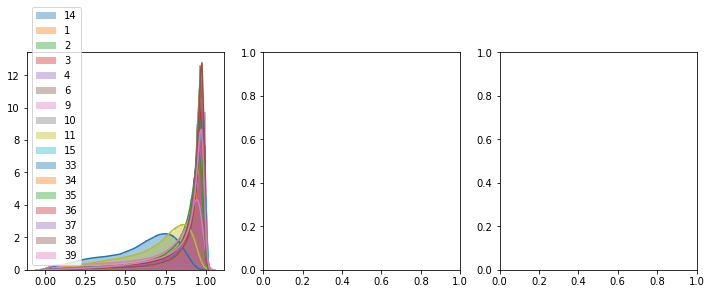

In [10]:
# Microglia DMR mCG

cluster = 14
ny = 1
nx = 3
fig, axs = plt.subplots(ny, nx, figsize=(4*nx, 4*ny))
axs = axs.flatten()
ax = axs[0]
sns.distplot(df_hypo.loc[df_hypo['hypo'].apply(lambda x: cluster in x), cluster].values, ax=ax, label=str(cluster))
for cl in clusters:
    if cl != cluster:
        sns.distplot(df_hypo.loc[df_hypo['hypo'].apply(lambda x: cluster in x), cl].fillna(0).values, ax=ax, label=str(cl))
ax.legend()
plt.show()

In [80]:
# global methylation level

mcgg = df_info.groupby('cluster')['mCG/CG'].median()
mcgg.head()

cluster
1    0.778805
2    0.768785
3    0.782750
4    0.768610
6    0.788010
Name: mCG/CG, dtype: float64

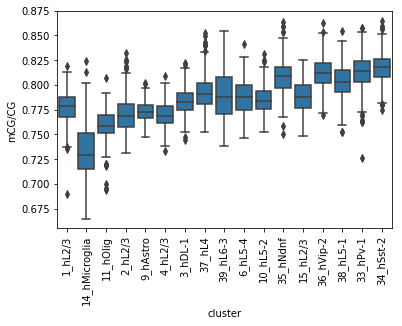

In [76]:
fig, ax = plt.subplots()
order = ndmr.sort_values('num', ascending=False)['cluster']
sns.boxplot(data=df_info, order=order, x='cluster', y='mCG/CG', color='C0', ax=ax)
ax.set_xticklabels(['{}_{}'.format(cluster, df_annot.loc[cluster, 'annotation']) for cluster in order], rotation=90)
plt.show()

In [63]:
# Microglia DMR mCG difference

cluster = 14
df_hypo_cl = df_hypo.loc[df_hypo['hypo'].apply(lambda x: cluster in x), clusters]
df_hypo_cl.head()

1         2         3         4         6   \
#chr start  end                                                        
1    235696 236127  0.752717  0.332574  0.800000  0.578199  0.821656   
     752454 752841  0.789883  0.474522  0.793103  0.592308  0.681034   
     753358 753723  0.912134  0.814634  0.896000  0.880000  0.961039   
     754108 754509  0.874106  0.820847  0.881720  0.856790  0.884615   
     791543 791753  0.900000  0.861538  0.872549  0.919540  0.933333   

                          9         10        11        14        15  \
#chr start  end                                                        
1    235696 236127  0.687831  0.640845  0.583333  0.517857  0.914530   
     752454 752841  0.000000  0.779412  0.100840  0.015504  0.600000   
     753358 753723  0.155556  0.872727  0.162562  0.207207  0.906250   
     754108 754509  0.408696  0.904153  0.457971  0.617363  0.861111   
     791543 791753  0.513158  0.933333  0.527778  0.500000  0.837209   

                          33        34        35        36        37  \
#chr start  end                                                        
1    235696 236127  0.847291  0.841584  0.756364  0.696581  0.839869   
     752454 752841  0.643312  0.645022  0.045872  0.085106  0.681416   
     753358 753723  0.890071  0.881443  0.511719  0.635659  0.811966   
     754108 754509  0.869640  0.891544  0.593443  0.770723  0.844771   
     791543 791753  0.934426  0.932836  0.920290  0.925000  0.857143   

                          38        39  
#chr start  end                         
1    235696 236127  0.927536  0.862832  
     752454 752841  0.788820  0.490798  
     753358 753723  0.870504  0.540670  
     754108 754509  0.903509  0.871921  
     791543 791753  0.910112  0.912281

In [64]:
y = df_hypo_cl[cluster] - df_hypo_cl.drop(cluster, axis=1).mean(axis=1)
x = df_hypo_cl[cluster]

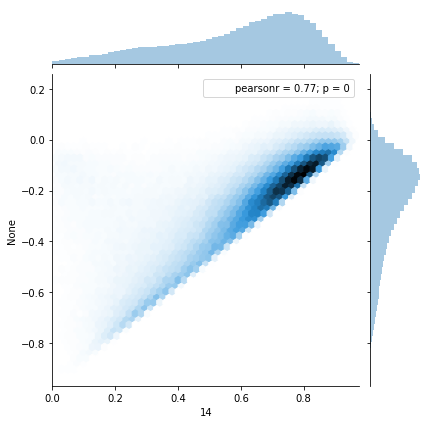

In [65]:
g = sns.jointplot(x, y, kind='hex')
plt.show()

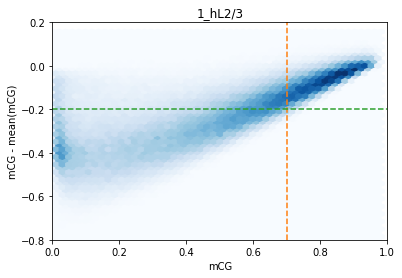

In [100]:
# prototype

cluster = 1
mcg = 0.7
diff = -0.2
fig, ax = plt.subplots()
df_hypo_cl = df_hypo.loc[df_hypo['hypo'].apply(lambda x: cluster in x), clusters]
y = df_hypo_cl[cluster] - df_hypo_cl.drop(cluster, axis=1).mean(axis=1)
x = df_hypo_cl[cluster]
ax.hexbin(x, y, gridsize=50, cmap='Blues', 
               # norm=colors.LogNorm()
              )
ax.axvline(x=mcg, color='C1', linestyle='--') 
ax.axhline(y=diff, color='C2', linestyle='--')
ax.set_title('{}_{}'.format(cluster, df_annot.loc[cluster, 'annotation']))
ax.set_xlabel('mCG')
ax.set_ylabel('mCG - mean(mCG)')
ax.set_xlim([0, 1])
ax.set_ylim([-0.8, 0.2])
plt.show()

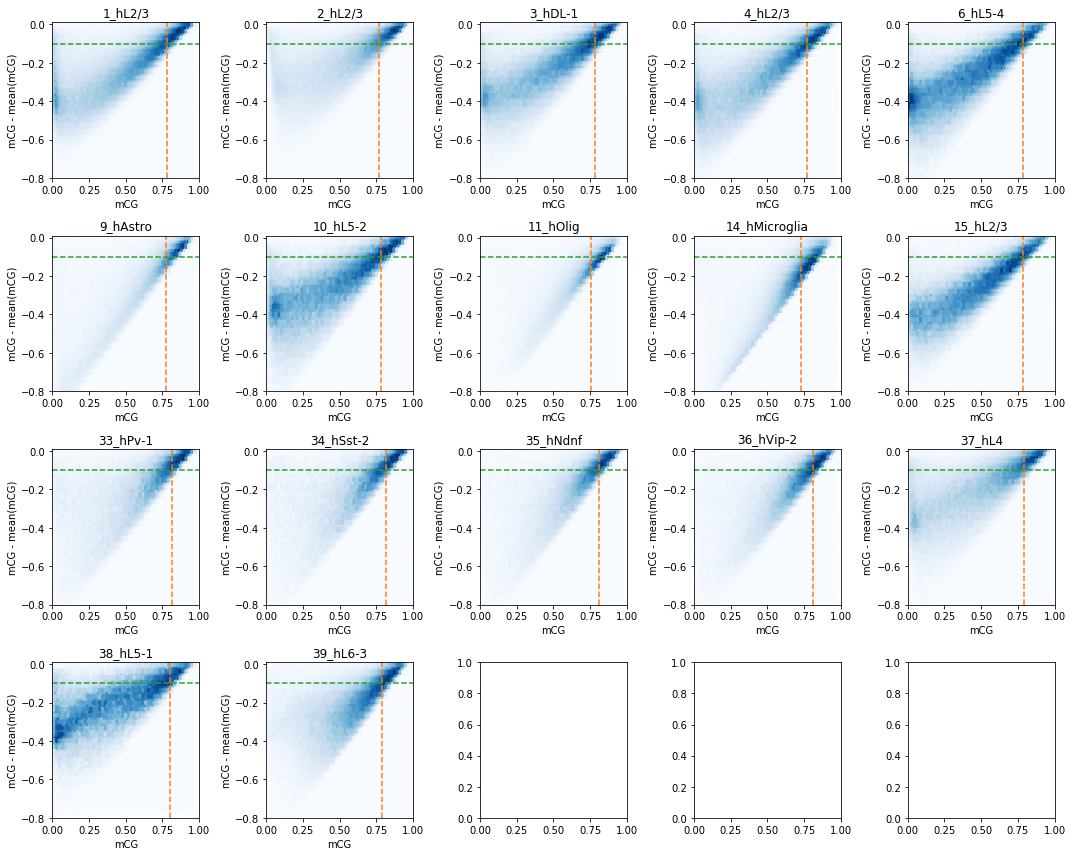

In [132]:
n = len(clusters)
diff = -0.1 

nx = 5
ny = int((n+nx-1)/nx)
fig, axs = plt.subplots(ny, nx, figsize=(nx*3, ny*3))
for cluster, mcg, ax in zip(clusters, mcgg, axs.flatten()):
    df_hypo_cl = df_hypo.loc[df_hypo['hypo'].apply(lambda x: cluster in x), clusters]
    y = df_hypo_cl[cluster] - df_hypo_cl.drop(cluster, axis=1).mean(axis=1)
    x = df_hypo_cl[cluster]
    hb = ax.hexbin(x, y, gridsize=50, cmap='Blues', 
                   # norm=colors.LogNorm()
                  )
    ax.axvline(x=mcg, color='C1', linestyle='--') 
    ax.axhline(y=diff, color='C2', linestyle='--')
    ax.set_title('{}_{}'.format(cluster, df_annot.loc[cluster, 'annotation']))
    ax.set_xlabel('mCG')
    ax.set_ylabel('mCG - mean(mCG)')
    ax.set_xlim([0, 1])
    ax.set_ylim([-0.8, 0.01])
                 
fig.tight_layout()
plt.show()

In [129]:
tr = -0.1
trimed_num = []
for cluster, mcg in zip(clusters, mcgg):
    df_hypo_cl = df_hypo.loc[df_hypo['hypo'].apply(lambda x: cluster in x), clusters]
    y = df_hypo_cl[cluster] - df_hypo_cl.drop(cluster, axis=1).mean(axis=1)
    x = df_hypo_cl[cluster]
    trimed_num.append({'cluster': cluster,
              'tr_num': ((x<mcg)&(y<tr)).sum(),
             })
trimed_num = pd.DataFrame(trimed_num)

In [130]:
# number of dmrs in each cluster
ndmr = []
for cluster in clusters:
    n = df_hypo.loc[df_hypo['hypo'].apply(lambda x: cluster in x), 'hypo'].shape[0]
    ndmr.append({'cluster': cluster, 
                 'num': n})
    
ndmr = pd.DataFrame(ndmr)
ndmr = pd.merge(ndmr, trimed_num, on='cluster')
ndmr['frac'] = ndmr['tr_num']/ndmr['num']

In [152]:
tidy = ndmr.rename(columns={'num': 'Orig', 'tr_num': 'Trimmed'}).melt(
    id_vars='cluster', value_vars=['Orig', 'Trimmed'])
tidy.head()

,cluster,variable,value
0,1,Orig,322285
1,2,Orig,288351
2,3,Orig,193386
3,4,Orig,245976
4,6,Orig,143959


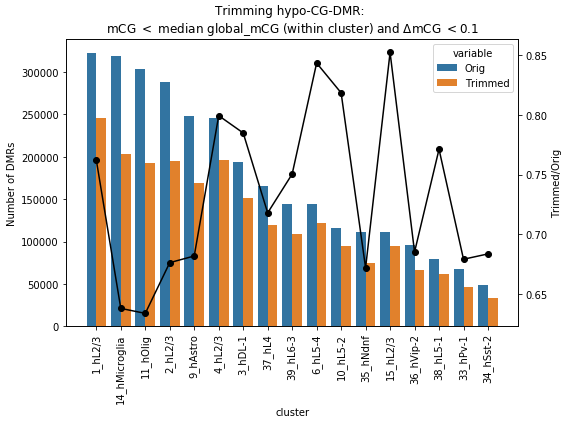

In [192]:
# number of dmrs in each cluster
fig, ax = plt.subplots(figsize=(8, 6))
order = ndmr.sort_values('num', ascending=False)['cluster']
sns.barplot(data=tidy, order=order, x='cluster', y='value', hue='variable', ax=ax)
ax.set_xticklabels(['{}_{}'.format(cluster, df_annot.loc[cluster, 'annotation']) for cluster in order], rotation=90)
ax.set_ylabel('Number of DMRs')

ax = ax.twinx()
ax.plot(ndmr.set_index('cluster').loc[order, 'frac'].values, '-o', color='black')
ax.set_ylabel('Trimmed/Orig')

ax.set_title(r"""Trimming hypo-CG-DMR: 
mCG $<$ median global_mCG (within cluster) and $\Delta$mCG $<0.1$""")

fig.tight_layout()
plt.show()

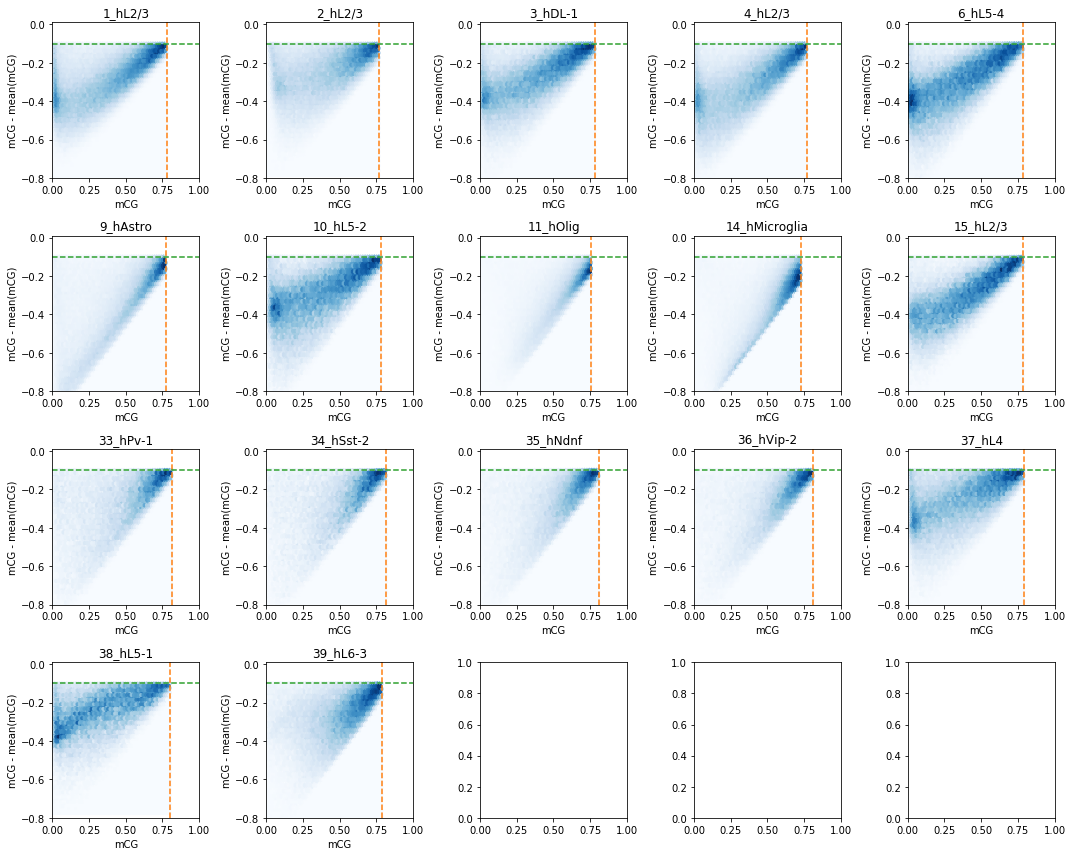

In [197]:
# get them and to save them file
n = len(clusters)
diff = -0.1 

nx = 5
ny = int((n+nx-1)/nx)
fig, axs = plt.subplots(ny, nx, figsize=(nx*3, ny*3))
for cluster, mcg, ax in zip(clusters, mcgg, axs.flatten()):
    df_hypo_cl = df_hypo.loc[df_hypo['hypo'].apply(lambda x: cluster in x), clusters]
    y = df_hypo_cl[cluster] - df_hypo_cl.drop(cluster, axis=1).mean(axis=1)
    x = df_hypo_cl[cluster]
    condition = (x < mcg) & (y < diff)
    x = x[condition]
    y = y[condition]
    
    hb = ax.hexbin(x, y, gridsize=50, cmap='Blues', 
                   # norm=colors.LogNorm()
                  )
    ax.axvline(x=mcg, color='C1', linestyle='--') 
    ax.axhline(y=diff, color='C2', linestyle='--')
    ax.set_title('{}_{}'.format(cluster, df_annot.loc[cluster, 'annotation']))
    ax.set_xlabel('mCG')
    ax.set_ylabel('mCG - mean(mCG)')
    ax.set_xlim([0, 1])
    ax.set_ylim([-0.8, 0.01])
                 
fig.tight_layout()
plt.show()



In [200]:
# get them and to save them file
n = len(clusters)
diff = -0.1 

for cluster, mcg in zip(clusters, mcgg):
    df_hypo_cl = df_hypo.loc[df_hypo['hypo'].apply(lambda x: cluster in x), clusters]
    y = df_hypo_cl[cluster] - df_hypo_cl.drop(cluster, axis=1).mean(axis=1)
    x = df_hypo_cl[cluster]
    condition = (x < mcg) & (y < diff)
    output = os.path.join(PATH_ENSEMBLES, ens, 'dmr', cluster_type, '{}_hypo_trimmed.bed'.format(cluster))
    df.loc[df_hypo_cl.loc[condition].index, 'number_of_dms'].to_csv(output, sep='\t', na_rep='NA', header=None, index=True)
    logging.info("Saved to {}".format(output))


05/11/2018 05:00:02 PM Saved to /cndd/Public_Datasets/human_snmcseq/Ensembles/Ens0/dmr/mCH_npc50_k30_merged/1_hypo_trimmed.bed
05/11/2018 05:00:10 PM Saved to /cndd/Public_Datasets/human_snmcseq/Ensembles/Ens0/dmr/mCH_npc50_k30_merged/2_hypo_trimmed.bed
05/11/2018 05:00:17 PM Saved to /cndd/Public_Datasets/human_snmcseq/Ensembles/Ens0/dmr/mCH_npc50_k30_merged/3_hypo_trimmed.bed
05/11/2018 05:00:24 PM Saved to /cndd/Public_Datasets/human_snmcseq/Ensembles/Ens0/dmr/mCH_npc50_k30_merged/4_hypo_trimmed.bed
05/11/2018 05:00:30 PM Saved to /cndd/Public_Datasets/human_snmcseq/Ensembles/Ens0/dmr/mCH_npc50_k30_merged/6_hypo_trimmed.bed
05/11/2018 05:00:37 PM Saved to /cndd/Public_Datasets/human_snmcseq/Ensembles/Ens0/dmr/mCH_npc50_k30_merged/9_hypo_trimmed.bed
05/11/2018 05:00:41 PM Saved to /cndd/Public_Datasets/human_snmcseq/Ensembles/Ens0/dmr/mCH_npc50_k30_merged/10_hypo_trimmed.bed
05/11/2018 05:00:47 PM Saved to /cndd/Public_Datasets/human_snmcseq/Ensembles/Ens0/dmr/mCH_npc50_k30_merged/11